In [6]:
# Import libraries to be used
import pandas as pd
import sqlite3

In [13]:
# Import im.db

conn = sqlite3.connect('./data/im.db')
query = '''SELECT 
                mb.genres,
                mr.averagerating, mr.numvotes
            FROM movie_basics AS mb
            JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
            ORDER BY mr.numvotes DESC;
        '''
df = pd.read_sql_query(query, conn)

conn.close()


df.head()

,genres,averagerating,numvotes
0,"Action,Adventure,Sci-Fi",8.8,1841066
1,"Action,Thriller",8.4,1387769
2,"Adventure,Drama,Sci-Fi",8.6,1299334
3,"Drama,Western",8.4,1211405
4,"Action,Adventure,Sci-Fi",8.1,1183655


<Figure size 1200x600 with 0 Axes>

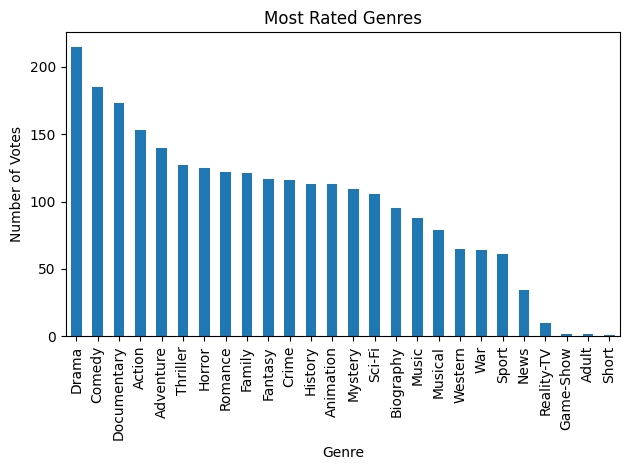

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('./data/im.db')

# Modify your SQL query to aggregate the data by genre and sum the numvotes
query = '''
    SELECT
        mb.genres,
        SUM(mr.numvotes) AS total_numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    GROUP BY mb.genres
    ORDER BY total_numvotes DESC
'''

# Read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Drop rows with None or null values in the 'genres' column
df = df.dropna(subset=['genres'])

# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split(',')

# Create a dictionary to store the count of each genre
genre_count = {}

# Iterate through the DataFrame and count the occurrences of each genre
for genres in df['genres']:
    for genre in genres:
        genre = genre.strip()
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

# Convert the dictionary into a DataFrame
genre_df = pd.DataFrame.from_dict(genre_count, orient='index', columns=['count'])
genre_df = genre_df.sort_values(by='count', ascending=False)

# Plot the graph
plt.figure(figsize=(12, 6))
genre_df.plot(kind='bar', legend=False)
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Most Rated Genres')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

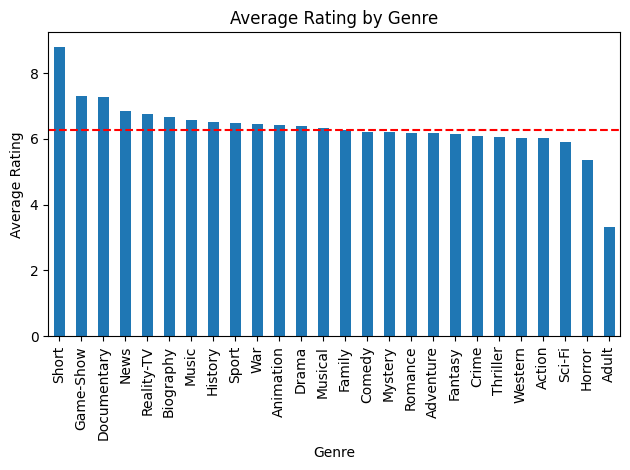

In [49]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('./data/im.db')

# Modify your SQL query to aggregate the data by genre and calculate the average rating
query = '''
    SELECT
        mb.genres,
        AVG(mr.averagerating) AS avg_rating
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    GROUP BY mb.genres
    ORDER BY avg_rating DESC
'''

# Read the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Drop rows with None or null values in the 'genres' column
df = df.dropna(subset=['genres'])

# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split(',')

# Create a dictionary to store the average rating of each genre
genre_avg_rating = {}

# Iterate through the DataFrame and calculate the average rating for each genre
for index, row in df.iterrows():
    genres = row['genres']
    avg_rating = row['avg_rating']
    for genre in genres:
        genre = genre.strip()
        if genre in genre_avg_rating:
            genre_avg_rating[genre].append(avg_rating)
        else:
            genre_avg_rating[genre] = [avg_rating]

# Calculate the average of average ratings for each genre
genre_avg_rating_avg = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_avg_rating.items()}

# Convert the dictionary into a DataFrame
genre_avg_rating_df = pd.DataFrame.from_dict(genre_avg_rating_avg, orient='index', columns=['avg_rating'])
genre_avg_rating_df = genre_avg_rating_df.sort_values(by='avg_rating', ascending=False)
overall_avg_rating = df['avg_rating'].mean()

# Plot the graph
plt.figure(figsize=(12, 6))
genre_avg_rating_df.plot(kind='bar', legend=False)
plt.axhline(y=overall_avg_rating, color='red', linestyle='--', label='Overall Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [88]:
# Modify your SQL query to aggregate the data by genre and calculate the average rating
conn = sqlite3.connect('./data/im.db')
query = '''
    SELECT
        pe.primary_name,
        pr.category,
        mb.genres
    FROM persons AS pe
    JOIN principals AS pr ON pr.person_id == pe.person_id
    JOIN movie_basics AS mb ON pr.movie_id == mb.movie_id
    WHERE mb.genres LIKE '%Action%' OR mb.genres LIKE '%Adventure%';
'''

# Read the data into a DataFrame
principals = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

principals.head(20)

,primary_name,category,genres
0,Naushad,composer,"Action,Crime,Drama"
1,Abrar Alvi,writer,"Action,Crime,Drama"
2,Gulzar,writer,"Action,Crime,Drama"
3,Dilip Kumar,actor,"Action,Crime,Drama"
4,Sanjeev Kumar,actor,"Action,Crime,Drama"
5,Harnam Singh Rawail,director,"Action,Crime,Drama"
6,Balraj Sahni,actor,"Action,Crime,Drama"
7,Vyjayanthimala,actress,"Action,Crime,Drama"
8,Mahasweta Devi,writer,"Action,Crime,Drama"
9,Anjana Rawail,writer,"Action,Crime,Drama"


In [63]:
conn = sqlite3.connect('./data/im.db')
query = '''
    SELECT
        *
    FROM known_for
'''

# Read the data into a DataFrame
known_for = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [8]:
# Import bom dataset
bom_df = pd.read_csv('./data/bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
# Import rt.movie_info.tsv
movie_info = pd.read_csv('./data/rt.movie_info.tsv', delimiter='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


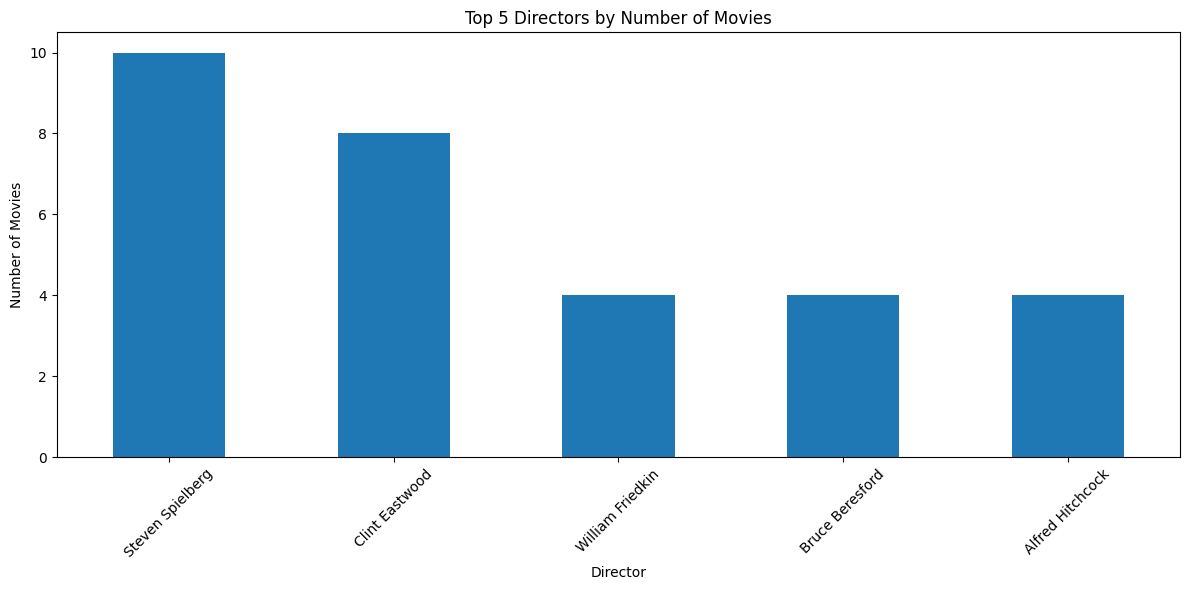

In [100]:
# Split the 'director' column into a list of directors
movie_info['director'] = movie_info['director'].str.split('|')

# Create a list of all directors
all_directors = [director for directors in movie_info['director'] if isinstance(directors, list) for director in directors]

# Create a Series to count the occurrences of each director
director_counts = pd.Series(all_directors).value_counts()

# Select the top 5 directors
top_5_directors = director_counts.head(5)

# Plot the graph
plt.figure(figsize=(12, 6))
top_5_directors.plot(kind='bar', legend=False)
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 5 Directors by Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

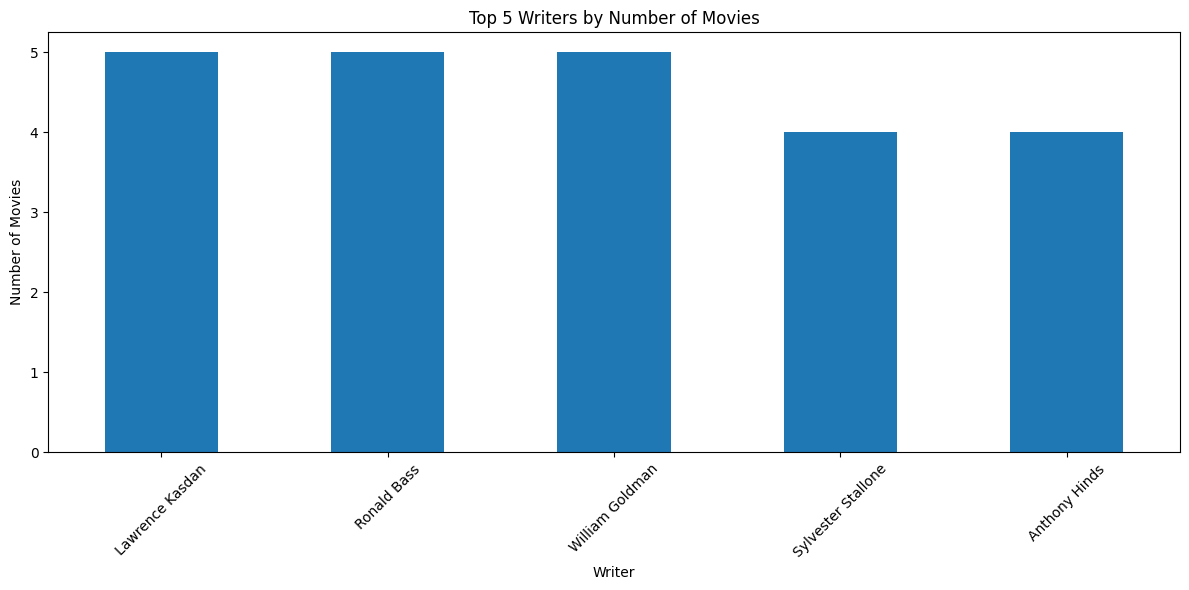

In [101]:
# Split the 'writer' column into a list of writers
movie_info['writer'] = movie_info['writer'].str.split('|')

# Create a list of all writers
all_writers = [writer for writers in movie_info['writer'] if isinstance(writers, list) for writer in writers]

# Create a Series to count the occurrences of each writer
writer_counts = pd.Series(all_writers).value_counts()

# Select the top 5 writers
top_5_writers = writer_counts.head(5)

# Plot the graph
plt.figure(figsize=(12, 6))
top_5_writers.plot(kind='bar', legend=False)
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.title('Top 5 Writers by Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

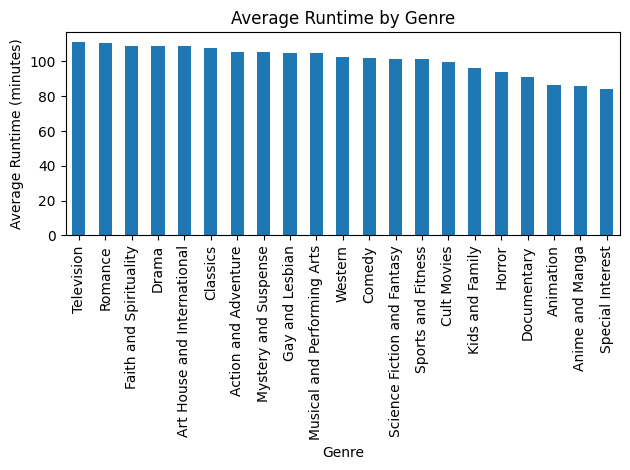

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
movie_info = pd.read_csv('./data/rt.movie_info.tsv', delimiter='\t')

# Split the 'genre' column into a list of genres
movie_info['genre'] = movie_info['genre'].str.split('|')

# Extract and convert runtime values to numeric (integer) format
movie_info['runtime'] = movie_info['runtime'].str.extract('(\d+)').astype(float)

# Create an empty dictionary to store genre-wise runtime
genre_runtime = {}

# Iterate through the DataFrame and calculate the average runtime for each genre
for index, row in movie_info.iterrows():
    genres = row['genre']
    runtime = row['runtime']
    
    # Check if runtime is not NaN and genres is a list
    if not pd.isna(runtime) and isinstance(genres, list):
        for genre in genres:
            genre = genre.strip()
            if genre in genre_runtime:
                genre_runtime[genre].append(runtime)
            else:
                genre_runtime[genre] = [runtime]

# Calculate the average runtime for each genre
genre_avg_runtime = {genre: sum(runtimes) / len(runtimes) for genre, runtimes in genre_runtime.items()}

# Convert the dictionary into a DataFrame
genre_avg_runtime_df = pd.DataFrame.from_dict(genre_avg_runtime, orient='index', columns=['avg_runtime'])
genre_avg_runtime_df = genre_avg_runtime_df.sort_values(by='avg_runtime', ascending=False)

# Plot the graph
plt.figure(figsize=(12, 6))
genre_avg_runtime_df.plot(kind='bar', legend=False)
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Import rt.reviews.tsv
reviews = pd.read_csv('./data/rt.reviews.tsv', delimiter='\t', encoding='latin1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [48]:
reviews = reviews.dropna()
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [29]:
# Import tmdb.movies.tsv
movies = pd.read_csv('./data/tmdb.movies.csv')
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [74]:

# Create a dictionary mapping genre IDs to their values
genre_mapping = {
    '28': 'Action',
    '12': 'Adventure',
    '16': 'Animation',
    '35': 'Comedy',
    '80': 'Crime',
    '99': 'Documentary',
    '18': 'Drama',
    '10751': 'Family',
    '14': 'Fantasy',
    '36': 'History',
    '27': 'Horror',
    '10402': 'Music',
    '9648': 'Mystery',
    '10749': 'Romance',
    '878': 'Science Fiction',
    '10770': 'TV Movie',
    '53': 'Thriller',
    '10752': 'War',
    '37': 'Western'
}

# Load the CSV file into a DataFrame
movies = pd.read_csv('./data/tmdb.movies.csv')

# Convert the genre_ids strings into lists
movies['genre_ids'] = movies['genre_ids'].apply(lambda x: x.strip('[]').split(', '))

# Replace genre_ids with their corresponding values
movies['genre_ids'] = movies['genre_ids'].apply(lambda ids: [genre_mapping.get(gid, gid) for gid in ids])

# Display the modified DataFrame
movies.head()
# movie = movies[movies['title'] == "Avatar"]
# movie


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


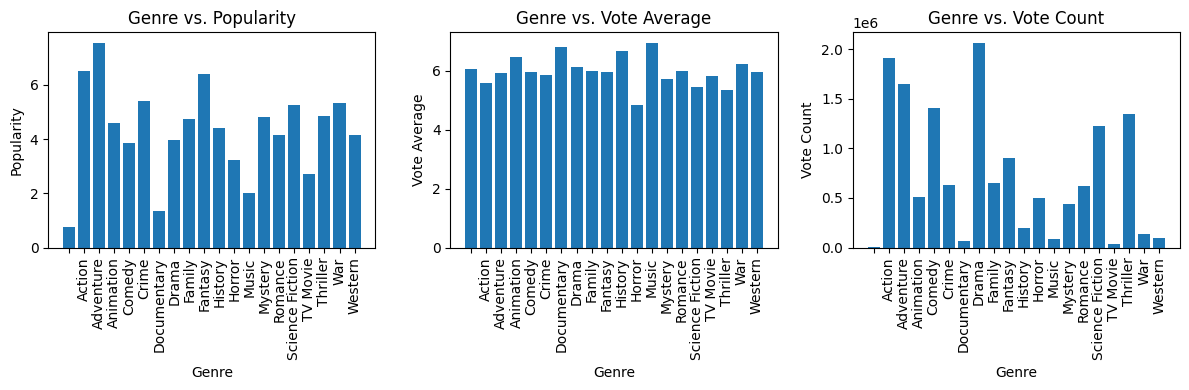

In [37]:
movies = movies.explode('genre_ids')

# Group the data by genre and calculate the mean popularity, mean vote_average, and sum of vote_count
genre_stats = movies.groupby('genre_ids').agg({'popularity': 'mean', 'vote_average': 'mean', 'vote_count': 'sum'}).reset_index()

# Create the plots
plt.figure(figsize=(12, 4))

# Chart 1: Genre vs. Popularity
plt.subplot(1, 3, 1)
plt.bar(genre_stats['genre_ids'], genre_stats['popularity'])
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Genre vs. Popularity')
plt.xticks(rotation=90)

# Chart 2: Genre vs. Vote Average
plt.subplot(1, 3, 2)
plt.bar(genre_stats['genre_ids'], genre_stats['vote_average'])
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.title('Genre vs. Vote Average')
plt.xticks(rotation=90)

# Chart 3: Genre vs. Vote Count
plt.subplot(1, 3, 3)
plt.bar(genre_stats['genre_ids'], genre_stats['vote_count'])
plt.xlabel('Genre')
plt.ylabel('Vote Count')
plt.title('Genre vs. Vote Count')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

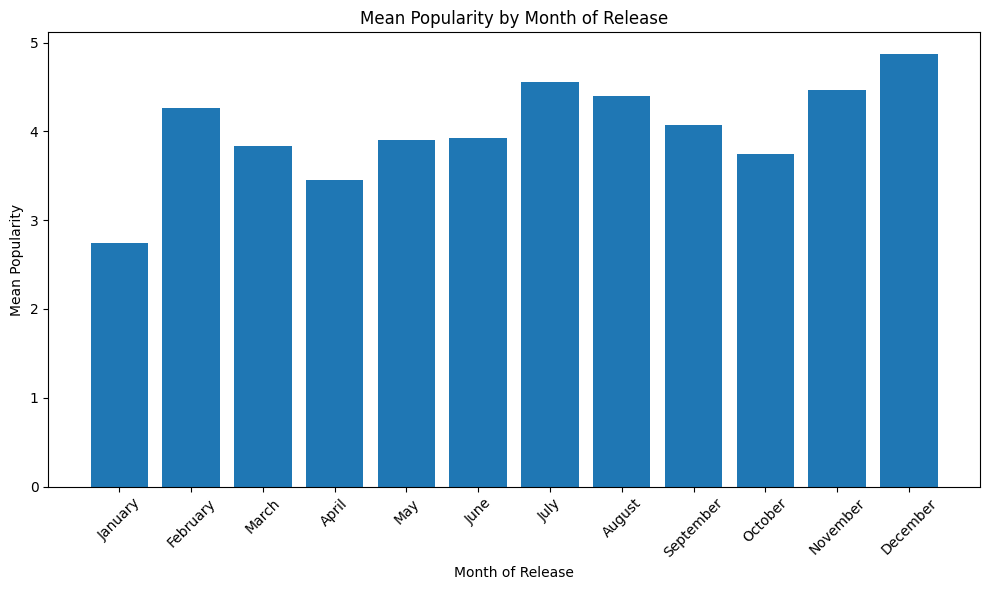

In [38]:
# Convert 'release_date' to a datetime object and extract the month
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_month'] = movies['release_date'].dt.month_name()

# Group the data by release month and calculate the mean popularity
month_stats = movies.groupby('release_month')['popularity'].mean().reset_index()

# Sort the months in chronological order
month_stats['release_month'] = pd.Categorical(month_stats['release_month'], 
                                              categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                          'July', 'August', 'September', 'October', 'November', 'December'],
                                              ordered=True)
month_stats = month_stats.sort_values('release_month')

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(month_stats['release_month'], month_stats['popularity'])
plt.xlabel('Month of Release')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity by Month of Release')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
# Import tmdb.movies.tsv
budgets = pd.read_csv('./data/tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


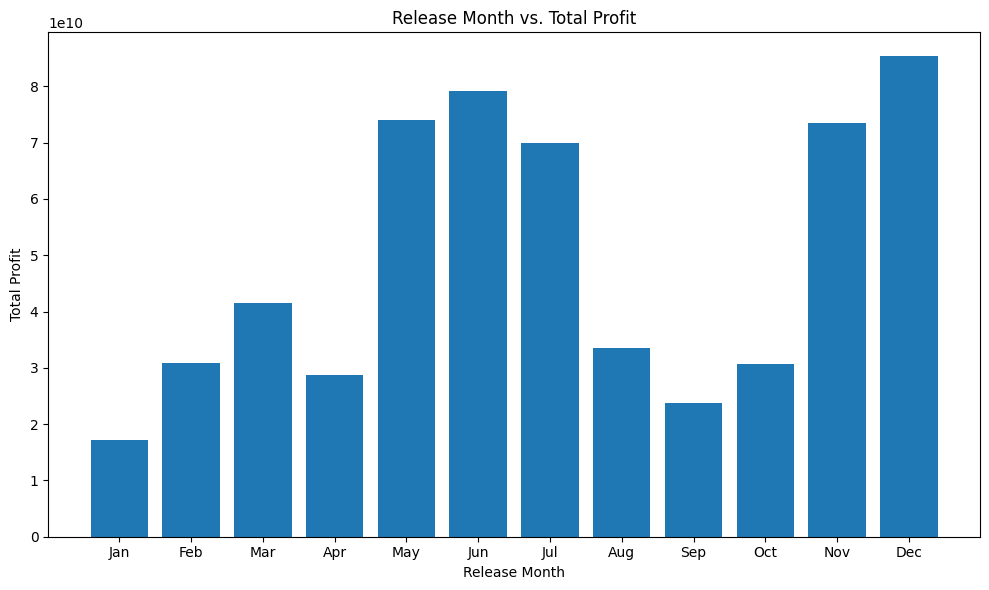

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
budgets = pd.read_csv('./data/tn.movie_budgets.csv')

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' to numeric
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate profit
budgets['profit'] = budgets['domestic_gross'] + budgets['worldwide_gross'] - budgets['production_budget']

# Convert 'release_date' to datetime and extract the month
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['release_month'] = budgets['release_date'].dt.month

# Create a new DataFrame with release month and profit
release_profit_df = budgets[['release_month', 'profit']]

# Group the data by release month and calculate total profit
monthly_profit = release_profit_df.groupby('release_month')['profit'].sum().reset_index()

# Plot a graph to visualize release month against total profit
plt.figure(figsize=(10, 6))
plt.bar(monthly_profit['release_month'], monthly_profit['profit'])
plt.xlabel('Release Month')
plt.ylabel('Total Profit')
plt.title('Release Month vs. Total Profit')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


In [39]:
# Extract numerical values from columns 'production_budget', 'domestic_gross', and 'worldwide_gross'
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculate the total gross (domestic + worldwide)
budgets['total_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross']

# Calculate the profit (total gross - production budget)
budgets['profit'] = budgets['total_gross'] - budgets['production_budget']

# Create a new DataFrame for profits with movie titles and their corresponding profits
profits_df = budgets[['movie', 'profit']]

# Display the first few rows of the profits DataFrame
profits_df.head()

,movie,profit
0,Avatar,3.111853e+09
1,Pirates of the Caribbean: On Stranger Tides,8.761278e+08
2,Dark Phoenix,-1.574753e+08
3,Avengers: Age of Ultron,1.531420e+09
4,Star Wars Ep. VIII: The Last Jedi,1.619903e+09


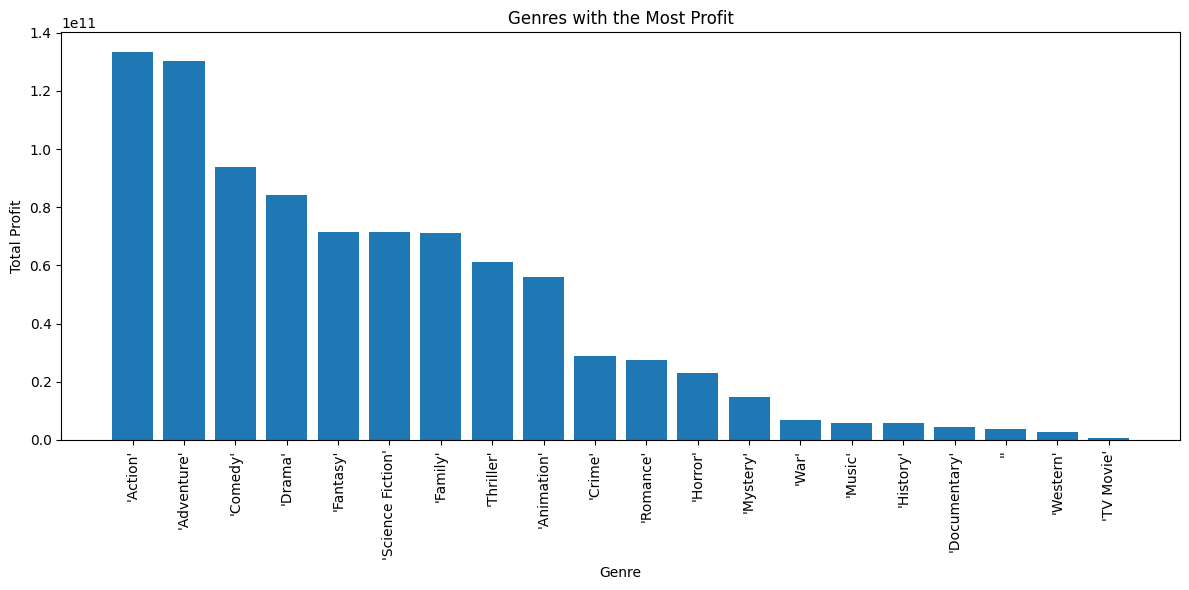

In [84]:
# Merge the datasets based on the 'title' and 'original_title' columns
combined_df = pd.merge(profits_df, movies, left_on='movie', right_on='original_title')

# Convert the 'genre_ids' column to string
combined_df['genre_ids'] = combined_df['genre_ids'].astype(str)

# Explode the 'genre_ids' column to separate genres
combined_df['genre_ids'] = combined_df['genre_ids'].str.strip('[]').str.split(', ')
combined_df = combined_df.explode('genre_ids')

# Convert the profit column to float
combined_df['profit'] = combined_df['profit'].astype(float)

# Calculate the total profit for each genre
genre_profit = combined_df.groupby('genre_ids')['profit'].sum().reset_index()

# Sort the genres by profit in descending order
genre_profit = genre_profit.sort_values(by='profit', ascending=False)


# Plot a chart to visualize the genres with the most profit
plt.figure(figsize=(12, 6))
plt.bar(genre_profit['genre_ids'], genre_profit['profit'])
plt.xlabel('Genre')
plt.ylabel('Total Profit')
plt.title('Genres with the Most Profit')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#Action and Adventure make the most profit